In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [6]:
df_main = pd.read_csv('all_data.csv')
df_main.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [10]:
print(df_main.shape)
print(df_main.columns)
print(df_main.describe())

(96, 4)
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


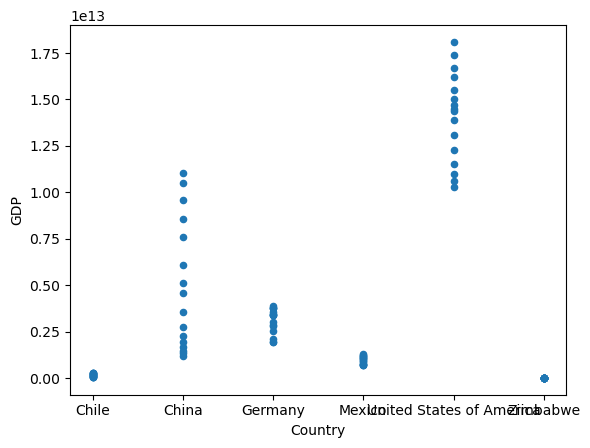

In [13]:
pandas_plot = df_main.plot(kind='scatter', x='Country', y='GDP')